In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Problema 

El precio de un sistema de energía solar es dado por:

$$U=35A +208V$$

dónde $A$ es la superficie del collector y $V$ es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se debe considerar que: 

$$A\left(290 - \frac{100}{V}\right) = 5833.3$$

Adicionalmente, el volumen de la batería $V$ está relacionado a la temperatura de operación del sistema $T$, y está configurado tal que:

$$V=\frac{50}{T-20}$$

Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados centígrados. Se desea optmizar el costo $U$ considerando todas las limitaciones presentadas.

## Solución

Juntando todas las expresiones y expresando en términos de $T$, tenemos la siguiente ecuación:

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Puesto que la temperatura $T$ está limitada al rango $[40, 90]$, la función será ploteada en este rango.

In [2]:
def GraficarFuncionObjetivo():
    a,b = 40,90
    
    T = np.linspace(a, b, 100)
    U = (204165.5)/(330 - 2*T) + (10400)/(T - 20)

    plt.figure(figsize=(6, 3))
    plt.plot(T, U, 'b')
    plt.plot(55.08, 1225.17, 'ko')
    plt.annotate(r'$55.08, 1225.17$', (55.08, 1225.17), (50, 1250))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()
    
    return None

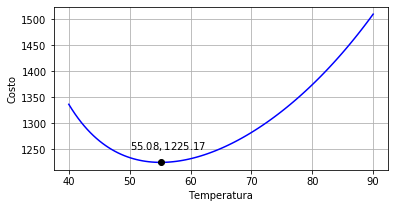

In [3]:
GraficarFuncionObjetivo()

In [4]:
def U(T):
    return (204165.5)/(330-2*T) + (10400)/(T-20)

In [5]:
U(55.08)

1225.1656408350887

# Algoritmo del método de Fibonacci

* **Paso 1:** Definir: $n$.
* **Paso 2:** Calcular la serie de Fibonacci con $n$ valores. 
* **Paso 3:** Definir: $a$, $b$, $L$, $k=2$ y $\epsilon$
* **Paso 4:** Calcular: $L_k^*$, $x_a$, $x_b$, $f(x_a)$, $f(x_b)$
* **Paso 5:** **if** $f(x_a) > f(x_b)$
    * **then** $a = x_a$
    * **else** $b = x_b$
* **Paso 6:** Incrementar $k = k + 1$
* **Paso 7:** **if** $\vert a-b\vert > \epsilon$
    * **then** goto Paso 4
    * **else** goto Paso 8
* **Paso 8:** Imprimir $x_a$ y $f(x_a)$

# Método recursivo

In [6]:
def Fibonacci(*params):
    a   = params[0]
    b   = params[1]
    k   = params[2]
    it  = params[3]
    reg = params[4]
    L   = params[5]
    n   = params[6]
    fs  = params[7]
    ep  = params[8]

    i_arriba = n - k + 1 
    i_abajo = n + 1
    Lk = L*fs[i_arriba]/fs[i_abajo]

    xa = a + Lk
    xb = b - Lk

    U_xa = U(xa)
    U_xb = U(xb)

    if(U_xa > U_xb):
        a = xa
    else:
        b = xb
        
    if(np.abs(U_xa-U_xb) > ep):
        k = k + 1
        it = it + 1
        
        reg.append([it, xa, U_xa])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
    
        return Fibonacci(a, b, k, it, reg, L, n, fs, ep)
    else:
        print("-------------------------------------------------------")
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
        
        return reg

In [7]:
def RunFibonacci():
    n = 30
    
    fs = [1, 1]
    for i in range(n):
        aux = fs[-1] + fs[-2]
        fs.append(aux)
    
    a, b, k = 40, 90, 2
    L = b - a
    
    return Fibonacci(a, b, k, 0, [], b-a, n, fs, 1e-6)

In [8]:
reg = RunFibonacci()

It: 01 - Temp: 59.0983005625 - Costo: 1229.9349491623
It: 02 - Temp: 51.8033988750 - Costo: 1228.8272286788
It: 03 - Temp: 47.2949016875 - Costo: 1248.2990546850
It: 04 - Temp: 51.8033988750 - Costo: 1228.8272286788
It: 05 - Temp: 54.5898033750 - Costo: 1225.2438371362
It: 06 - Temp: 53.5254915625 - Costo: 1225.9614290233
It: 07 - Temp: 54.5898033750 - Costo: 1225.2438371362
It: 08 - Temp: 55.2475842500 - Costo: 1225.1741606876
It: 09 - Temp: 54.9963343125 - Costo: 1225.1680564661
It: 10 - Temp: 54.8410533125 - Costo: 1225.1844049120
It: 11 - Temp: 54.9963343125 - Costo: 1225.1680564661
It: 12 - Temp: 55.0923032499 - Costo: 1225.1656613366
It: 13 - Temp: 55.0556463752 - Costo: 1225.1658840054
It: 14 - Temp: 55.0923032499 - Costo: 1225.1656613366
It: 15 - Temp: 55.0783015633 - Costo: 1225.1656455603
It: 16 - Temp: 55.0696480619 - Costo: 1225.1656981083
It: 17 - Temp: 55.0783015633 - Costo: 1225.1656455603
It: 18 - Temp: 55.0836497485 - Costo: 1225.1656368837
It: 19 - Temp: 55.0816068795

# Evaluación del método

In [9]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

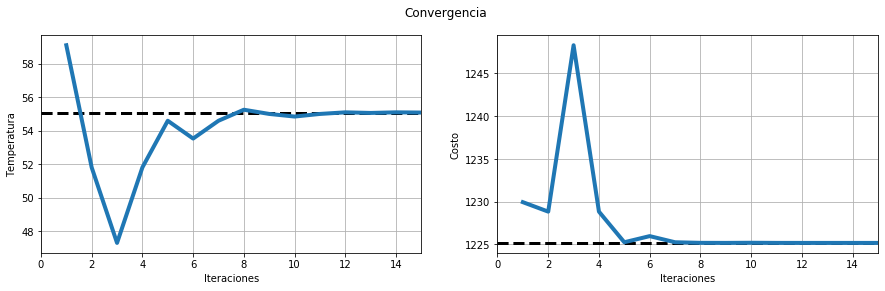

In [10]:
Evaluacion(reg)